# Image Corpus Creation and Binary Classification using DNN

### Steps 1- Dataset Creation:

Dataset is created and the images are stored in separate folders for each class under one folder name 'Image'.

Two classes of images are created they are:

1. White Tiger

2. Zebra

### Steps 2- Pre-Processing:

In [18]:
import warnings
warnings.filterwarnings("ignore")

import time
from time import process_time 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import os

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense

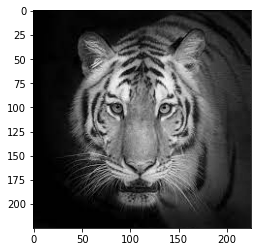

In [2]:
datadir ="Image"
categories =['Tiger']

for category in categories:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

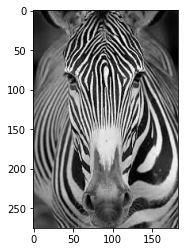

In [3]:
datadir ="Image"
categories =['Zebra']

for category in categories:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [4]:
datadir = "Image"
categories = ['Tiger', 'Zebra']

In [5]:
data = []
img_size=500

def preprocess():
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            num_array = cv2.resize(img_array,(img_size, img_size))
            
            data.append([num_array, class_num])
            
preprocess()

In [6]:
print(len(data))

20


### Steps 3- Dataset Preparation:

In [7]:
X = []
y = []

for features,label in data:
    X.append(features)
    y.append(label)

X = np.asarray(X).reshape(-1,img_size,img_size,1)
y = np.asarray(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
print("Shape of the following:")
print("X_train =", X_train.shape, "\nX_test =", X_test.shape, "\ny_train =", y_train.shape, "\ny_test =", y_test.shape)

Shape of the following:
X_train = (15, 500, 500, 1) 
X_test = (5, 500, 500, 1) 
y_train = (15,) 
y_test = (5,)


### Step 4 - Model Creation:

In [10]:
model = Sequential()
model.add(Dense(8, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(loss='mean_squared_error', metrics=['binary_accuracy'])

In [12]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.4260 - binary_accuracy: 0.4667 - val_loss: 0.2779 - val_binary_accuracy: 0.5997
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 0.3511 - binary_accuracy: 0.4670 - val_loss: 0.2487 - val_binary_accuracy: 0.5664
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 0.2506 - binary_accuracy: 0.4797 - val_loss: 0.2718 - val_binary_accuracy: 0.4000
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 0.2530 - binary_accuracy: 0.5333 - val_loss: 0.2438 - val_binary_accuracy: 0.5899
Epoch 5/100
1/1 [==============================] - 1s 1s/step - loss: 0.2568 - binary_accuracy: 0.4728 - val_loss: 0.2884 - val_binary_accuracy: 0.4000
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: 0.2607 - binary_accuracy: 0.5333 - val_loss: 0.2439 - val_binary_accuracy: 0.5891
Epoch 7/100
1/1 [==============================] - 1s 1s/step - loss: 0.2564 - binary_ac

In [13]:
model.evaluate(X_train, y_train)

1/1 [==============================] - 1s 618ms/step - loss: 0.2527 - binary_accuracy: 0.4794


[0.2526600956916809, 0.4794366955757141]

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 16        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


### Step 5 - Performance Analysis:

#### a. Single layer neural network Performance Analysis

In [22]:
def performance_analysis(datadir, categories, img_size, nodes):
    
    df_results = pd.DataFrame(data=np.zeros(shape=(0, 5)), 
                              columns = ['Img size','Nodes Number','Accuracy','Loss','Training time'])
 
    training_data = []
    
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])

    X=[]
    y=[]
    
    for features,label in training_data:
        X.append(features)
        y.append(label)
    X=np.asarray(X).reshape(-1,img_size,img_size,1)
    y=np.asarray(y)

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

    count = 0
    t_start = process_time() 
    
    model = Sequential()
    model.add(Dense(nodes, input_dim=1, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='mean_squared_error', metrics=['binary_accuracy'])
    model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)
    
    t_stop = process_time() 
    t_elapsed = t_stop - t_start
    
    score = model.evaluate(X_test,y_test)
    
    count+=1

    df_results.loc[count,'Img size'] = img_size
    df_results.loc[count,'Nodes Number'] = nodes
    df_results.loc[count,'Accuracy'] = score[1]
    df_results.loc[count,'Loss'] = score[0]
    df_results.loc[count,'Training time'] = t_elapsed
        
    return df_results

In [31]:
def evaluation():
    m1 = performance_analysis("Image", ['Tiger', 'Zebra'], 500, 8)
    m2 = performance_analysis("Image", ['Tiger', 'Zebra'], 500, 16)
    m3 = performance_analysis("Image", ['Tiger', 'Zebra'], 500, 32)
    m4 = performance_analysis("Image", ['Tiger', 'Zebra'], 500, 64)
    m5 = performance_analysis("Image", ['Tiger', 'Zebra'], 100, 8)
    m6 = performance_analysis("Image", ['Tiger', 'Zebra'], 100, 16)
    m7 = performance_analysis("Image", ['Tiger', 'Zebra'], 100, 32)
    m8 = performance_analysis("Image", ['Tiger', 'Zebra'], 100, 64)
    m9 = performance_analysis("Image", ['Tiger', 'Zebra'], 50, 8)
    m10 = performance_analysis("Image", ['Tiger', 'Zebra'], 50, 16)
    m11 = performance_analysis("Image", ['Tiger', 'Zebra'], 50, 32)
    m12 = performance_analysis("Image", ['Tiger', 'Zebra'], 50, 64)
    m13 = performance_analysis("Image", ['Tiger', 'Zebra'], 25, 8)
    m14 = performance_analysis("Image", ['Tiger', 'Zebra'], 25, 16)
    m15 = performance_analysis("Image", ['Tiger', 'Zebra'], 25, 32)
    m16 = performance_analysis("Image", ['Tiger', 'Zebra'], 25, 64)
    m17 = performance_analysis("Image", ['Tiger', 'Zebra'], 10, 8)
    m18 = performance_analysis("Image", ['Tiger', 'Zebra'], 10, 16)
    m19 = performance_analysis("Image", ['Tiger', 'Zebra'], 10, 32)
    m20 = performance_analysis("Image", ['Tiger', 'Zebra'], 10, 64)
    
    df = pd.concat([m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17,m18,m19,m20], axis=0)
    
    return df

In [32]:
evaluation()

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.5068 - binary_accuracy: 0.4667 - val_loss: 0.3907 - val_binary_accuracy: 0.5997
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 0.5063 - binary_accuracy: 0.4670 - val_loss: 0.3904 - val_binary_accuracy: 0.5997
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 0.5058 - binary_accuracy: 0.4670 - val_loss: 0.3902 - val_binary_accuracy: 0.5997
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 0.5054 - binary_accuracy: 0.4670 - val_loss: 0.3900 - val_binary_accuracy: 0.5997
Epoch 5/100
1/1 [==============================] - 1s 1s/step - loss: 0.5051 - binary_accuracy: 0.4670 - val_loss: 0.3897 - val_binary_accuracy: 0.5997
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: 0.5047 - binary_accuracy: 0.4670 - val_loss: 0.3895 - val_binary_accuracy: 0.5997
Epoch 7/100
1/1 [==============================] - 1s 1s/step - loss: 0.5043 - binary_ac

Epoch 48/100
1/1 [==============================] - 1s 1s/step - loss: 0.2566 - binary_accuracy: 0.4853 - val_loss: 0.2834 - val_binary_accuracy: 0.4000
Epoch 49/100
1/1 [==============================] - 1s 1s/step - loss: 0.2563 - binary_accuracy: 0.5333 - val_loss: 0.2480 - val_binary_accuracy: 0.5265
Epoch 50/100
1/1 [==============================] - 1s 1s/step - loss: 0.2533 - binary_accuracy: 0.4898 - val_loss: 0.2747 - val_binary_accuracy: 0.4000
Epoch 51/100
1/1 [==============================] - 1s 1s/step - loss: 0.2526 - binary_accuracy: 0.5333 - val_loss: 0.2498 - val_binary_accuracy: 0.5080
Epoch 52/100
1/1 [==============================] - 1s 1s/step - loss: 0.2515 - binary_accuracy: 0.4955 - val_loss: 0.2711 - val_binary_accuracy: 0.4000
Epoch 53/100
1/1 [==============================] - 1s 1s/step - loss: 0.2513 - binary_accuracy: 0.5333 - val_loss: 0.2505 - val_binary_accuracy: 0.5000
Epoch 54/100
1/1 [==============================] - 1s 1s/step - loss: 0.2510 - bi

1/1 [==============================] - 2s 2s/step - loss: 0.2622 - binary_accuracy: 0.5333 - val_loss: 0.2462 - val_binary_accuracy: 0.5473
Epoch 48/100
1/1 [==============================] - 2s 2s/step - loss: 0.2595 - binary_accuracy: 0.4848 - val_loss: 0.2942 - val_binary_accuracy: 0.4000
Epoch 49/100
1/1 [==============================] - 2s 2s/step - loss: 0.2613 - binary_accuracy: 0.5333 - val_loss: 0.2463 - val_binary_accuracy: 0.5462
Epoch 50/100
1/1 [==============================] - 2s 2s/step - loss: 0.2592 - binary_accuracy: 0.4850 - val_loss: 0.2937 - val_binary_accuracy: 0.4000
Epoch 51/100
1/1 [==============================] - 2s 2s/step - loss: 0.2611 - binary_accuracy: 0.5333 - val_loss: 0.2463 - val_binary_accuracy: 0.5462
Epoch 52/100
1/1 [==============================] - 2s 2s/step - loss: 0.2591 - binary_accuracy: 0.4850 - val_loss: 0.2936 - val_binary_accuracy: 0.4000
Epoch 53/100
1/1 [==============================] - 2s 2s/step - loss: 0.2610 - binary_accuracy

1/1 [==============================] - 2s 2s/step - loss: 0.2574 - binary_accuracy: 0.4749 - val_loss: 0.2864 - val_binary_accuracy: 0.4000
Epoch 47/100
1/1 [==============================] - 2s 2s/step - loss: 0.2594 - binary_accuracy: 0.5333 - val_loss: 0.2438 - val_binary_accuracy: 0.5843
Epoch 48/100
1/1 [==============================] - 2s 2s/step - loss: 0.2574 - binary_accuracy: 0.4749 - val_loss: 0.2864 - val_binary_accuracy: 0.4000
Epoch 49/100
1/1 [==============================] - 2s 2s/step - loss: 0.2593 - binary_accuracy: 0.5333 - val_loss: 0.2438 - val_binary_accuracy: 0.5843
Epoch 50/100
1/1 [==============================] - 2s 2s/step - loss: 0.2574 - binary_accuracy: 0.4749 - val_loss: 0.2864 - val_binary_accuracy: 0.4000
Epoch 51/100
1/1 [==============================] - 3s 3s/step - loss: 0.2593 - binary_accuracy: 0.5333 - val_loss: 0.2438 - val_binary_accuracy: 0.5843
Epoch 52/100
1/1 [==============================] - 2s 2s/step - loss: 0.2574 - binary_accuracy

1/1 [==============================] - 4s 4s/step - loss: 0.2852 - binary_accuracy: 0.5330 - val_loss: 0.2426 - val_binary_accuracy: 0.6000
Epoch 46/100
1/1 [==============================] - 4s 4s/step - loss: 0.2669 - binary_accuracy: 0.4667 - val_loss: 0.3264 - val_binary_accuracy: 0.4003
Epoch 47/100
1/1 [==============================] - 4s 4s/step - loss: 0.2837 - binary_accuracy: 0.5330 - val_loss: 0.2427 - val_binary_accuracy: 0.6000
Epoch 48/100
1/1 [==============================] - 3s 3s/step - loss: 0.2680 - binary_accuracy: 0.4667 - val_loss: 0.3275 - val_binary_accuracy: 0.4003
Epoch 49/100
1/1 [==============================] - 4s 4s/step - loss: 0.2844 - binary_accuracy: 0.5330 - val_loss: 0.2427 - val_binary_accuracy: 0.6000
Epoch 50/100
1/1 [==============================] - 4s 4s/step - loss: 0.2673 - binary_accuracy: 0.4667 - val_loss: 0.3263 - val_binary_accuracy: 0.4003
Epoch 51/100
1/1 [==============================] - 4s 4s/step - loss: 0.2836 - binary_accuracy

Epoch 44/100
1/1 [==============================] - 0s 98ms/step - loss: 0.2852 - binary_accuracy: 0.4758 - val_loss: 0.2772 - val_binary_accuracy: 0.4000
Epoch 45/100
1/1 [==============================] - 0s 92ms/step - loss: 0.2540 - binary_accuracy: 0.5333 - val_loss: 0.2493 - val_binary_accuracy: 0.5133
Epoch 46/100
1/1 [==============================] - 0s 96ms/step - loss: 0.2512 - binary_accuracy: 0.4936 - val_loss: 0.2672 - val_binary_accuracy: 0.4000
Epoch 47/100
1/1 [==============================] - 0s 98ms/step - loss: 0.2505 - binary_accuracy: 0.5333 - val_loss: 0.2513 - val_binary_accuracy: 0.4756
Epoch 48/100
1/1 [==============================] - 0s 94ms/step - loss: 0.2500 - binary_accuracy: 0.5047 - val_loss: 0.2652 - val_binary_accuracy: 0.4000
Epoch 49/100
1/1 [==============================] - 0s 99ms/step - loss: 0.2499 - binary_accuracy: 0.5333 - val_loss: 0.2514 - val_binary_accuracy: 0.4712
Epoch 50/100
1/1 [==============================] - 0s 91ms/step - los

Epoch 97/100
1/1 [==============================] - 0s 106ms/step - loss: 0.2521 - binary_accuracy: 0.5333 - val_loss: 0.2484 - val_binary_accuracy: 0.5245
Epoch 98/100
1/1 [==============================] - 0s 114ms/step - loss: 0.2519 - binary_accuracy: 0.4903 - val_loss: 0.2723 - val_binary_accuracy: 0.4000
Epoch 99/100
1/1 [==============================] - 0s 98ms/step - loss: 0.2521 - binary_accuracy: 0.5333 - val_loss: 0.2485 - val_binary_accuracy: 0.5236
Epoch 100/100
1/1 [==============================] - 0s 32ms/step - loss: 0.2723 - binary_accuracy: 0.4000
Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.4501 - binary_accuracy: 0.5330 - val_loss: 0.5900 - val_binary_accuracy: 0.4003
Epoch 2/100
1/1 [==============================] - 0s 108ms/step - loss: 0.4499 - binary_accuracy: 0.5330 - val_loss: 0.5898 - val_binary_accuracy: 0.4003
Epoch 3/100
1/1 [==============================] - 0s 117ms/step - loss: 0.4498 - binary_accuracy: 0.5330 - val_loss: 0

1/1 [==============================] - 0s 113ms/step - loss: 0.3922 - binary_accuracy: 0.5269 - val_loss: 0.4527 - val_binary_accuracy: 0.4127
Epoch 95/100
1/1 [==============================] - 0s 114ms/step - loss: 0.3694 - binary_accuracy: 0.5261 - val_loss: 0.3791 - val_binary_accuracy: 0.4175
Epoch 96/100
1/1 [==============================] - 0s 110ms/step - loss: 0.3225 - binary_accuracy: 0.5245 - val_loss: 0.2667 - val_binary_accuracy: 0.4560
Epoch 97/100
1/1 [==============================] - 0s 105ms/step - loss: 0.2548 - binary_accuracy: 0.5145 - val_loss: 0.2409 - val_binary_accuracy: 0.6000
Epoch 98/100
1/1 [==============================] - 0s 113ms/step - loss: 0.2601 - binary_accuracy: 0.4667 - val_loss: 0.2869 - val_binary_accuracy: 0.4370
Epoch 99/100
1/1 [==============================] - 0s 112ms/step - loss: 0.2642 - binary_accuracy: 0.5193 - val_loss: 0.2421 - val_binary_accuracy: 0.6000
Epoch 100/100
1/1 [==============================] - 0s 23ms/step - loss: 0.2

1/1 [==============================] - 0s 142ms/step - loss: 0.2614 - binary_accuracy: 0.4667 - val_loss: 0.2933 - val_binary_accuracy: 0.4237
Epoch 92/100
1/1 [==============================] - 0s 138ms/step - loss: 0.2662 - binary_accuracy: 0.5225 - val_loss: 0.2411 - val_binary_accuracy: 0.6000
Epoch 93/100
1/1 [==============================] - 0s 144ms/step - loss: 0.2614 - binary_accuracy: 0.4667 - val_loss: 0.2934 - val_binary_accuracy: 0.4227
Epoch 94/100
1/1 [==============================] - 0s 137ms/step - loss: 0.2662 - binary_accuracy: 0.5227 - val_loss: 0.2411 - val_binary_accuracy: 0.6000
Epoch 95/100
1/1 [==============================] - 0s 143ms/step - loss: 0.2614 - binary_accuracy: 0.4667 - val_loss: 0.2934 - val_binary_accuracy: 0.4227
Epoch 96/100
1/1 [==============================] - 0s 125ms/step - loss: 0.2662 - binary_accuracy: 0.5227 - val_loss: 0.2411 - val_binary_accuracy: 0.6000
Epoch 97/100
1/1 [==============================] - 0s 129ms/step - loss: 0.2

1/1 [==============================] - 0s 209ms/step - loss: 0.2683 - binary_accuracy: 0.4734 - val_loss: 0.3308 - val_binary_accuracy: 0.4000
Epoch 89/100
1/1 [==============================] - 0s 220ms/step - loss: 0.2858 - binary_accuracy: 0.5333 - val_loss: 0.2433 - val_binary_accuracy: 0.5879
Epoch 90/100
1/1 [==============================] - 0s 218ms/step - loss: 0.2683 - binary_accuracy: 0.4737 - val_loss: 0.3308 - val_binary_accuracy: 0.4000
Epoch 91/100
1/1 [==============================] - 0s 209ms/step - loss: 0.2858 - binary_accuracy: 0.5333 - val_loss: 0.2433 - val_binary_accuracy: 0.5879
Epoch 92/100
1/1 [==============================] - 0s 218ms/step - loss: 0.2683 - binary_accuracy: 0.4737 - val_loss: 0.3308 - val_binary_accuracy: 0.4000
Epoch 93/100
1/1 [==============================] - 0s 201ms/step - loss: 0.2857 - binary_accuracy: 0.5333 - val_loss: 0.2433 - val_binary_accuracy: 0.5879
Epoch 94/100
1/1 [==============================] - 0s 218ms/step - loss: 0.2

Epoch 34/100
1/1 [==============================] - 0s 68ms/step - loss: 0.2547 - binary_accuracy: 0.4830 - val_loss: 0.2802 - val_binary_accuracy: 0.4000
Epoch 35/100
1/1 [==============================] - 0s 64ms/step - loss: 0.2555 - binary_accuracy: 0.5333 - val_loss: 0.2460 - val_binary_accuracy: 0.5544
Epoch 36/100
1/1 [==============================] - 0s 59ms/step - loss: 0.2547 - binary_accuracy: 0.4830 - val_loss: 0.2807 - val_binary_accuracy: 0.4000
Epoch 37/100
1/1 [==============================] - 0s 59ms/step - loss: 0.2557 - binary_accuracy: 0.5333 - val_loss: 0.2459 - val_binary_accuracy: 0.5561
Epoch 38/100
1/1 [==============================] - 0s 65ms/step - loss: 0.2550 - binary_accuracy: 0.4825 - val_loss: 0.2813 - val_binary_accuracy: 0.4000
Epoch 39/100
1/1 [==============================] - 0s 60ms/step - loss: 0.2560 - binary_accuracy: 0.5333 - val_loss: 0.2458 - val_binary_accuracy: 0.5561
Epoch 40/100
1/1 [==============================] - 0s 58ms/step - los

Epoch 87/100
1/1 [==============================] - 0s 66ms/step - loss: 0.2560 - binary_accuracy: 0.5333 - val_loss: 0.2459 - val_binary_accuracy: 0.5552
Epoch 88/100
1/1 [==============================] - 0s 62ms/step - loss: 0.2551 - binary_accuracy: 0.4828 - val_loss: 0.2815 - val_binary_accuracy: 0.4000
Epoch 89/100
1/1 [==============================] - 0s 66ms/step - loss: 0.2560 - binary_accuracy: 0.5333 - val_loss: 0.2459 - val_binary_accuracy: 0.5552
Epoch 90/100
1/1 [==============================] - 0s 61ms/step - loss: 0.2551 - binary_accuracy: 0.4828 - val_loss: 0.2815 - val_binary_accuracy: 0.4000
Epoch 91/100
1/1 [==============================] - 0s 62ms/step - loss: 0.2560 - binary_accuracy: 0.5333 - val_loss: 0.2459 - val_binary_accuracy: 0.5552
Epoch 92/100
1/1 [==============================] - 0s 61ms/step - loss: 0.2551 - binary_accuracy: 0.4828 - val_loss: 0.2815 - val_binary_accuracy: 0.4000
Epoch 93/100
1/1 [==============================] - 0s 61ms/step - los

Epoch 33/100
1/1 [==============================] - 0s 60ms/step - loss: 0.2577 - binary_accuracy: 0.5333 - val_loss: 0.2458 - val_binary_accuracy: 0.5536
Epoch 34/100
1/1 [==============================] - 0s 67ms/step - loss: 0.2561 - binary_accuracy: 0.4833 - val_loss: 0.2844 - val_binary_accuracy: 0.4000
Epoch 35/100
1/1 [==============================] - 0s 66ms/step - loss: 0.2571 - binary_accuracy: 0.5333 - val_loss: 0.2459 - val_binary_accuracy: 0.5525
Epoch 36/100
1/1 [==============================] - 0s 66ms/step - loss: 0.2560 - binary_accuracy: 0.4835 - val_loss: 0.2845 - val_binary_accuracy: 0.4000
Epoch 37/100
1/1 [==============================] - 0s 65ms/step - loss: 0.2572 - binary_accuracy: 0.5333 - val_loss: 0.2458 - val_binary_accuracy: 0.5536
Epoch 38/100
1/1 [==============================] - 0s 59ms/step - loss: 0.2561 - binary_accuracy: 0.4833 - val_loss: 0.2850 - val_binary_accuracy: 0.4000
Epoch 39/100
1/1 [==============================] - 0s 67ms/step - los

Epoch 86/100
1/1 [==============================] - 0s 62ms/step - loss: 0.2563 - binary_accuracy: 0.4830 - val_loss: 0.2852 - val_binary_accuracy: 0.4000
Epoch 87/100
1/1 [==============================] - 0s 62ms/step - loss: 0.2575 - binary_accuracy: 0.5333 - val_loss: 0.2457 - val_binary_accuracy: 0.5544
Epoch 88/100
1/1 [==============================] - 0s 47ms/step - loss: 0.2563 - binary_accuracy: 0.4830 - val_loss: 0.2852 - val_binary_accuracy: 0.4000
Epoch 89/100
1/1 [==============================] - 0s 78ms/step - loss: 0.2575 - binary_accuracy: 0.5333 - val_loss: 0.2457 - val_binary_accuracy: 0.5544
Epoch 90/100
1/1 [==============================] - 0s 101ms/step - loss: 0.2563 - binary_accuracy: 0.4830 - val_loss: 0.2852 - val_binary_accuracy: 0.4000
Epoch 91/100
1/1 [==============================] - 0s 80ms/step - loss: 0.2575 - binary_accuracy: 0.5333 - val_loss: 0.2457 - val_binary_accuracy: 0.5544
Epoch 92/100
1/1 [==============================] - 0s 82ms/step - lo

Epoch 32/100
1/1 [==============================] - 0s 77ms/step - loss: 0.2569 - binary_accuracy: 0.4667 - val_loss: 0.2780 - val_binary_accuracy: 0.4265
Epoch 33/100
1/1 [==============================] - 0s 80ms/step - loss: 0.2577 - binary_accuracy: 0.5219 - val_loss: 0.2429 - val_binary_accuracy: 0.6000
Epoch 34/100
1/1 [==============================] - 0s 74ms/step - loss: 0.2556 - binary_accuracy: 0.4667 - val_loss: 0.2754 - val_binary_accuracy: 0.4276
Epoch 35/100
1/1 [==============================] - 0s 67ms/step - loss: 0.2565 - binary_accuracy: 0.5217 - val_loss: 0.2431 - val_binary_accuracy: 0.6000
Epoch 36/100
1/1 [==============================] - 0s 76ms/step - loss: 0.2552 - binary_accuracy: 0.4667 - val_loss: 0.2750 - val_binary_accuracy: 0.4276
Epoch 37/100
1/1 [==============================] - 0s 72ms/step - loss: 0.2563 - binary_accuracy: 0.5217 - val_loss: 0.2430 - val_binary_accuracy: 0.6000
Epoch 38/100
1/1 [==============================] - 0s 72ms/step - los

Epoch 85/100
1/1 [==============================] - 0s 70ms/step - loss: 0.2565 - binary_accuracy: 0.5236 - val_loss: 0.2432 - val_binary_accuracy: 0.6000
Epoch 86/100
1/1 [==============================] - 0s 71ms/step - loss: 0.2554 - binary_accuracy: 0.4667 - val_loss: 0.2770 - val_binary_accuracy: 0.4193
Epoch 87/100
1/1 [==============================] - 0s 67ms/step - loss: 0.2565 - binary_accuracy: 0.5236 - val_loss: 0.2433 - val_binary_accuracy: 0.6000
Epoch 88/100
1/1 [==============================] - 0s 78ms/step - loss: 0.2554 - binary_accuracy: 0.4667 - val_loss: 0.2770 - val_binary_accuracy: 0.4187
Epoch 89/100
1/1 [==============================] - 0s 87ms/step - loss: 0.2565 - binary_accuracy: 0.5238 - val_loss: 0.2433 - val_binary_accuracy: 0.6000
Epoch 90/100
1/1 [==============================] - 0s 78ms/step - loss: 0.2554 - binary_accuracy: 0.4667 - val_loss: 0.2770 - val_binary_accuracy: 0.4187
Epoch 91/100
1/1 [==============================] - 0s 73ms/step - los

Epoch 31/100
1/1 [==============================] - 0s 79ms/step - loss: 0.2695 - binary_accuracy: 0.4757 - val_loss: 0.3309 - val_binary_accuracy: 0.4000
Epoch 32/100
1/1 [==============================] - 0s 77ms/step - loss: 0.2851 - binary_accuracy: 0.5333 - val_loss: 0.2439 - val_binary_accuracy: 0.5813
Epoch 33/100
1/1 [==============================] - 0s 82ms/step - loss: 0.2675 - binary_accuracy: 0.4762 - val_loss: 0.3279 - val_binary_accuracy: 0.4000
Epoch 34/100
1/1 [==============================] - 0s 92ms/step - loss: 0.2831 - binary_accuracy: 0.5333 - val_loss: 0.2440 - val_binary_accuracy: 0.5818
Epoch 35/100
1/1 [==============================] - 0s 87ms/step - loss: 0.2686 - binary_accuracy: 0.4759 - val_loss: 0.3283 - val_binary_accuracy: 0.4000
Epoch 36/100
1/1 [==============================] - 0s 93ms/step - loss: 0.2834 - binary_accuracy: 0.5333 - val_loss: 0.2439 - val_binary_accuracy: 0.5818
Epoch 37/100
1/1 [==============================] - 0s 82ms/step - los

Epoch 84/100
1/1 [==============================] - 0s 81ms/step - loss: 0.2815 - binary_accuracy: 0.5333 - val_loss: 0.2439 - val_binary_accuracy: 0.5818
Epoch 85/100
1/1 [==============================] - 0s 83ms/step - loss: 0.2679 - binary_accuracy: 0.4759 - val_loss: 0.3253 - val_binary_accuracy: 0.4000
Epoch 86/100
1/1 [==============================] - 0s 84ms/step - loss: 0.2815 - binary_accuracy: 0.5333 - val_loss: 0.2439 - val_binary_accuracy: 0.5818
Epoch 87/100
1/1 [==============================] - 0s 83ms/step - loss: 0.2679 - binary_accuracy: 0.4759 - val_loss: 0.3253 - val_binary_accuracy: 0.4000
Epoch 88/100
1/1 [==============================] - 0s 82ms/step - loss: 0.2815 - binary_accuracy: 0.5333 - val_loss: 0.2439 - val_binary_accuracy: 0.5818
Epoch 89/100
1/1 [==============================] - 0s 80ms/step - loss: 0.2679 - binary_accuracy: 0.4759 - val_loss: 0.3253 - val_binary_accuracy: 0.4000
Epoch 90/100
1/1 [==============================] - 0s 79ms/step - los

Epoch 30/100
1/1 [==============================] - 0s 51ms/step - loss: 0.2495 - binary_accuracy: 0.5184 - val_loss: 0.2544 - val_binary_accuracy: 0.4400
Epoch 31/100
1/1 [==============================] - 0s 46ms/step - loss: 0.2495 - binary_accuracy: 0.5184 - val_loss: 0.2544 - val_binary_accuracy: 0.4391
Epoch 32/100
1/1 [==============================] - 0s 41ms/step - loss: 0.2495 - binary_accuracy: 0.5186 - val_loss: 0.2544 - val_binary_accuracy: 0.4391
Epoch 33/100
1/1 [==============================] - 0s 51ms/step - loss: 0.2495 - binary_accuracy: 0.5186 - val_loss: 0.2544 - val_binary_accuracy: 0.4383
Epoch 34/100
1/1 [==============================] - 0s 44ms/step - loss: 0.2495 - binary_accuracy: 0.5189 - val_loss: 0.2544 - val_binary_accuracy: 0.4383
Epoch 35/100
1/1 [==============================] - 0s 44ms/step - loss: 0.2495 - binary_accuracy: 0.5189 - val_loss: 0.2544 - val_binary_accuracy: 0.4374
Epoch 36/100
1/1 [==============================] - 0s 42ms/step - los

Epoch 83/100
1/1 [==============================] - 0s 47ms/step - loss: 0.2503 - binary_accuracy: 0.4667 - val_loss: 0.2622 - val_binary_accuracy: 0.4055
Epoch 84/100
1/1 [==============================] - 0s 51ms/step - loss: 0.2502 - binary_accuracy: 0.5280 - val_loss: 0.2500 - val_binary_accuracy: 0.5059
Epoch 85/100
1/1 [==============================] - 0s 50ms/step - loss: 0.2500 - binary_accuracy: 0.5002 - val_loss: 0.2612 - val_binary_accuracy: 0.4055
Epoch 86/100
1/1 [==============================] - 0s 50ms/step - loss: 0.2499 - binary_accuracy: 0.5280 - val_loss: 0.2504 - val_binary_accuracy: 0.4435
Epoch 87/100
1/1 [==============================] - 0s 47ms/step - loss: 0.2499 - binary_accuracy: 0.5174 - val_loss: 0.2609 - val_binary_accuracy: 0.4049
Epoch 88/100
1/1 [==============================] - 0s 47ms/step - loss: 0.2499 - binary_accuracy: 0.5284 - val_loss: 0.2504 - val_binary_accuracy: 0.4364
Epoch 89/100
1/1 [==============================] - 0s 48ms/step - los

Epoch 29/100
1/1 [==============================] - 0s 55ms/step - loss: 0.2636 - binary_accuracy: 0.5277 - val_loss: 0.2426 - val_binary_accuracy: 0.6000
Epoch 30/100
1/1 [==============================] - 0s 59ms/step - loss: 0.2601 - binary_accuracy: 0.4667 - val_loss: 0.2930 - val_binary_accuracy: 0.4066
Epoch 31/100
1/1 [==============================] - 0s 56ms/step - loss: 0.2636 - binary_accuracy: 0.5277 - val_loss: 0.2426 - val_binary_accuracy: 0.6000
Epoch 32/100
1/1 [==============================] - 0s 46ms/step - loss: 0.2601 - binary_accuracy: 0.4667 - val_loss: 0.2930 - val_binary_accuracy: 0.4066
Epoch 33/100
1/1 [==============================] - 0s 45ms/step - loss: 0.2636 - binary_accuracy: 0.5277 - val_loss: 0.2426 - val_binary_accuracy: 0.6000
Epoch 34/100
1/1 [==============================] - 0s 44ms/step - loss: 0.2601 - binary_accuracy: 0.4667 - val_loss: 0.2930 - val_binary_accuracy: 0.4055
Epoch 35/100
1/1 [==============================] - 0s 51ms/step - los

Epoch 82/100
1/1 [==============================] - 0s 51ms/step - loss: 0.2601 - binary_accuracy: 0.4667 - val_loss: 0.2933 - val_binary_accuracy: 0.4000
Epoch 83/100
1/1 [==============================] - 0s 52ms/step - loss: 0.2635 - binary_accuracy: 0.5333 - val_loss: 0.2428 - val_binary_accuracy: 0.6000
Epoch 84/100
1/1 [==============================] - 0s 51ms/step - loss: 0.2601 - binary_accuracy: 0.4667 - val_loss: 0.2933 - val_binary_accuracy: 0.4000
Epoch 85/100
1/1 [==============================] - 0s 48ms/step - loss: 0.2635 - binary_accuracy: 0.5333 - val_loss: 0.2428 - val_binary_accuracy: 0.6000
Epoch 86/100
1/1 [==============================] - 0s 48ms/step - loss: 0.2601 - binary_accuracy: 0.4667 - val_loss: 0.2933 - val_binary_accuracy: 0.4000
Epoch 87/100
1/1 [==============================] - 0s 46ms/step - loss: 0.2635 - binary_accuracy: 0.5333 - val_loss: 0.2428 - val_binary_accuracy: 0.6000
Epoch 88/100
1/1 [==============================] - 0s 42ms/step - los

Epoch 28/100
1/1 [==============================] - 0s 54ms/step - loss: 0.2734 - binary_accuracy: 0.5270 - val_loss: 0.2420 - val_binary_accuracy: 0.6000
Epoch 29/100
1/1 [==============================] - 0s 54ms/step - loss: 0.2647 - binary_accuracy: 0.4667 - val_loss: 0.3087 - val_binary_accuracy: 0.4104
Epoch 30/100
1/1 [==============================] - 0s 52ms/step - loss: 0.2732 - binary_accuracy: 0.5270 - val_loss: 0.2420 - val_binary_accuracy: 0.6000
Epoch 31/100
1/1 [==============================] - 0s 43ms/step - loss: 0.2644 - binary_accuracy: 0.4667 - val_loss: 0.3078 - val_binary_accuracy: 0.4104
Epoch 32/100
1/1 [==============================] - 0s 50ms/step - loss: 0.2726 - binary_accuracy: 0.5270 - val_loss: 0.2420 - val_binary_accuracy: 0.6000
Epoch 33/100
1/1 [==============================] - 0s 52ms/step - loss: 0.2643 - binary_accuracy: 0.4667 - val_loss: 0.3074 - val_binary_accuracy: 0.4104
Epoch 34/100
1/1 [==============================] - 0s 51ms/step - los

Epoch 81/100
1/1 [==============================] - 0s 51ms/step - loss: 0.2641 - binary_accuracy: 0.4667 - val_loss: 0.3068 - val_binary_accuracy: 0.4066
Epoch 82/100
1/1 [==============================] - 0s 50ms/step - loss: 0.2717 - binary_accuracy: 0.5277 - val_loss: 0.2423 - val_binary_accuracy: 0.6000
Epoch 83/100
1/1 [==============================] - 0s 53ms/step - loss: 0.2641 - binary_accuracy: 0.4667 - val_loss: 0.3068 - val_binary_accuracy: 0.4066
Epoch 84/100
1/1 [==============================] - 0s 53ms/step - loss: 0.2717 - binary_accuracy: 0.5277 - val_loss: 0.2423 - val_binary_accuracy: 0.6000
Epoch 85/100
1/1 [==============================] - 0s 54ms/step - loss: 0.2641 - binary_accuracy: 0.4667 - val_loss: 0.3068 - val_binary_accuracy: 0.4066
Epoch 86/100
1/1 [==============================] - 0s 51ms/step - loss: 0.2717 - binary_accuracy: 0.5277 - val_loss: 0.2423 - val_binary_accuracy: 0.6000
Epoch 87/100
1/1 [==============================] - 0s 56ms/step - los

Epoch 27/100
1/1 [==============================] - 0s 56ms/step - loss: 0.2667 - binary_accuracy: 0.4744 - val_loss: 0.3232 - val_binary_accuracy: 0.4000
Epoch 28/100
1/1 [==============================] - 0s 60ms/step - loss: 0.2807 - binary_accuracy: 0.5333 - val_loss: 0.2434 - val_binary_accuracy: 0.5856
Epoch 29/100
1/1 [==============================] - 0s 58ms/step - loss: 0.2677 - binary_accuracy: 0.4744 - val_loss: 0.3236 - val_binary_accuracy: 0.4000
Epoch 30/100
1/1 [==============================] - 0s 50ms/step - loss: 0.2809 - binary_accuracy: 0.5333 - val_loss: 0.2434 - val_binary_accuracy: 0.5856
Epoch 31/100
1/1 [==============================] - 0s 64ms/step - loss: 0.2670 - binary_accuracy: 0.4744 - val_loss: 0.3222 - val_binary_accuracy: 0.4000
Epoch 32/100
1/1 [==============================] - 0s 51ms/step - loss: 0.2800 - binary_accuracy: 0.5333 - val_loss: 0.2434 - val_binary_accuracy: 0.5856
Epoch 33/100
1/1 [==============================] - 0s 58ms/step - los

Epoch 80/100
1/1 [==============================] - 0s 60ms/step - loss: 0.2788 - binary_accuracy: 0.5333 - val_loss: 0.2435 - val_binary_accuracy: 0.5844
Epoch 81/100
1/1 [==============================] - 0s 59ms/step - loss: 0.2670 - binary_accuracy: 0.4749 - val_loss: 0.3204 - val_binary_accuracy: 0.4000
Epoch 82/100
1/1 [==============================] - 0s 49ms/step - loss: 0.2788 - binary_accuracy: 0.5333 - val_loss: 0.2435 - val_binary_accuracy: 0.5844
Epoch 83/100
1/1 [==============================] - 0s 50ms/step - loss: 0.2670 - binary_accuracy: 0.4749 - val_loss: 0.3204 - val_binary_accuracy: 0.4000
Epoch 84/100
1/1 [==============================] - 0s 53ms/step - loss: 0.2788 - binary_accuracy: 0.5333 - val_loss: 0.2435 - val_binary_accuracy: 0.5844
Epoch 85/100
1/1 [==============================] - 0s 55ms/step - loss: 0.2670 - binary_accuracy: 0.4749 - val_loss: 0.3204 - val_binary_accuracy: 0.4000
Epoch 86/100
1/1 [==============================] - 0s 56ms/step - los

Epoch 26/100
1/1 [==============================] - 0s 46ms/step - loss: 0.4461 - binary_accuracy: 0.5328 - val_loss: 0.5828 - val_binary_accuracy: 0.4004
Epoch 27/100
1/1 [==============================] - 0s 44ms/step - loss: 0.4460 - binary_accuracy: 0.5328 - val_loss: 0.5826 - val_binary_accuracy: 0.4004
Epoch 28/100
1/1 [==============================] - 0s 50ms/step - loss: 0.4458 - binary_accuracy: 0.5328 - val_loss: 0.5823 - val_binary_accuracy: 0.4004
Epoch 29/100
1/1 [==============================] - 0s 59ms/step - loss: 0.4457 - binary_accuracy: 0.5328 - val_loss: 0.5821 - val_binary_accuracy: 0.4004
Epoch 30/100
1/1 [==============================] - 0s 47ms/step - loss: 0.4455 - binary_accuracy: 0.5328 - val_loss: 0.5819 - val_binary_accuracy: 0.4004
Epoch 31/100
1/1 [==============================] - 0s 40ms/step - loss: 0.4454 - binary_accuracy: 0.5328 - val_loss: 0.5816 - val_binary_accuracy: 0.4004
Epoch 32/100
1/1 [==============================] - 0s 44ms/step - los

Epoch 79/100
1/1 [==============================] - 0s 50ms/step - loss: 0.2548 - binary_accuracy: 0.5156 - val_loss: 0.2434 - val_binary_accuracy: 0.6000
Epoch 80/100
1/1 [==============================] - 0s 41ms/step - loss: 0.2546 - binary_accuracy: 0.4667 - val_loss: 0.2699 - val_binary_accuracy: 0.4480
Epoch 81/100
1/1 [==============================] - 0s 38ms/step - loss: 0.2554 - binary_accuracy: 0.5161 - val_loss: 0.2431 - val_binary_accuracy: 0.6000
Epoch 82/100
1/1 [==============================] - 0s 47ms/step - loss: 0.2550 - binary_accuracy: 0.4667 - val_loss: 0.2709 - val_binary_accuracy: 0.4476
Epoch 83/100
1/1 [==============================] - 0s 44ms/step - loss: 0.2558 - binary_accuracy: 0.5164 - val_loss: 0.2431 - val_binary_accuracy: 0.6000
Epoch 84/100
1/1 [==============================] - 0s 43ms/step - loss: 0.2550 - binary_accuracy: 0.4667 - val_loss: 0.2706 - val_binary_accuracy: 0.4476
Epoch 85/100
1/1 [==============================] - 0s 44ms/step - los

Epoch 25/100
1/1 [==============================] - 0s 46ms/step - loss: 0.2763 - binary_accuracy: 0.4740 - val_loss: 0.2440 - val_binary_accuracy: 0.5856
Epoch 26/100
1/1 [==============================] - 0s 49ms/step - loss: 0.2713 - binary_accuracy: 0.4742 - val_loss: 0.2434 - val_binary_accuracy: 0.5852
Epoch 27/100
1/1 [==============================] - 0s 45ms/step - loss: 0.2669 - binary_accuracy: 0.4746 - val_loss: 0.2433 - val_binary_accuracy: 0.5844
Epoch 28/100
1/1 [==============================] - 0s 43ms/step - loss: 0.2632 - binary_accuracy: 0.4752 - val_loss: 0.2435 - val_binary_accuracy: 0.5828
Epoch 29/100
1/1 [==============================] - 0s 50ms/step - loss: 0.2600 - binary_accuracy: 0.4761 - val_loss: 0.2440 - val_binary_accuracy: 0.5812
Epoch 30/100
1/1 [==============================] - 0s 45ms/step - loss: 0.2575 - binary_accuracy: 0.4772 - val_loss: 0.2448 - val_binary_accuracy: 0.5752
Epoch 31/100
1/1 [==============================] - 0s 45ms/step - los

Epoch 78/100
1/1 [==============================] - 0s 48ms/step - loss: 0.2490 - binary_accuracy: 0.5333 - val_loss: 0.2565 - val_binary_accuracy: 0.4000
Epoch 79/100
1/1 [==============================] - 0s 43ms/step - loss: 0.2490 - binary_accuracy: 0.5333 - val_loss: 0.2565 - val_binary_accuracy: 0.4000
Epoch 80/100
1/1 [==============================] - 0s 46ms/step - loss: 0.2490 - binary_accuracy: 0.5333 - val_loss: 0.2566 - val_binary_accuracy: 0.4000
Epoch 81/100
1/1 [==============================] - 0s 42ms/step - loss: 0.2490 - binary_accuracy: 0.5333 - val_loss: 0.2566 - val_binary_accuracy: 0.4000
Epoch 82/100
1/1 [==============================] - 0s 38ms/step - loss: 0.2490 - binary_accuracy: 0.5333 - val_loss: 0.2566 - val_binary_accuracy: 0.4000
Epoch 83/100
1/1 [==============================] - 0s 48ms/step - loss: 0.2490 - binary_accuracy: 0.5333 - val_loss: 0.2566 - val_binary_accuracy: 0.4000
Epoch 84/100
1/1 [==============================] - 0s 54ms/step - los

Epoch 24/100
1/1 [==============================] - 0s 46ms/step - loss: 0.2614 - binary_accuracy: 0.5333 - val_loss: 0.2619 - val_binary_accuracy: 0.5852
Epoch 25/100
1/1 [==============================] - 0s 48ms/step - loss: 0.3165 - binary_accuracy: 0.4746 - val_loss: 0.3625 - val_binary_accuracy: 0.4000
Epoch 26/100
1/1 [==============================] - 0s 47ms/step - loss: 0.3035 - binary_accuracy: 0.5333 - val_loss: 0.2453 - val_binary_accuracy: 0.5752
Epoch 27/100
1/1 [==============================] - 0s 44ms/step - loss: 0.2715 - binary_accuracy: 0.4785 - val_loss: 0.3623 - val_binary_accuracy: 0.4000
Epoch 28/100
1/1 [==============================] - 0s 47ms/step - loss: 0.3033 - binary_accuracy: 0.5333 - val_loss: 0.2446 - val_binary_accuracy: 0.5632
Epoch 29/100
1/1 [==============================] - 0s 47ms/step - loss: 0.2627 - binary_accuracy: 0.4803 - val_loss: 0.3401 - val_binary_accuracy: 0.4000
Epoch 30/100
1/1 [==============================] - 0s 48ms/step - los

Epoch 77/100
1/1 [==============================] - 0s 49ms/step - loss: 0.2671 - binary_accuracy: 0.4787 - val_loss: 0.3205 - val_binary_accuracy: 0.4000
Epoch 78/100
1/1 [==============================] - 0s 53ms/step - loss: 0.2767 - binary_accuracy: 0.5333 - val_loss: 0.2446 - val_binary_accuracy: 0.5716
Epoch 79/100
1/1 [==============================] - 0s 46ms/step - loss: 0.2671 - binary_accuracy: 0.4787 - val_loss: 0.3205 - val_binary_accuracy: 0.4000
Epoch 80/100
1/1 [==============================] - 0s 38ms/step - loss: 0.2767 - binary_accuracy: 0.5333 - val_loss: 0.2446 - val_binary_accuracy: 0.5716
Epoch 81/100
1/1 [==============================] - 0s 49ms/step - loss: 0.2671 - binary_accuracy: 0.4787 - val_loss: 0.3204 - val_binary_accuracy: 0.4000
Epoch 82/100
1/1 [==============================] - 0s 57ms/step - loss: 0.2767 - binary_accuracy: 0.5333 - val_loss: 0.2446 - val_binary_accuracy: 0.5716
Epoch 83/100
1/1 [==============================] - 0s 39ms/step - los

Epoch 23/100
1/1 [==============================] - 0s 48ms/step - loss: 0.2639 - binary_accuracy: 0.4667 - val_loss: 0.3070 - val_binary_accuracy: 0.4080
Epoch 24/100
1/1 [==============================] - 0s 45ms/step - loss: 0.2710 - binary_accuracy: 0.5280 - val_loss: 0.2422 - val_binary_accuracy: 0.6000
Epoch 25/100
1/1 [==============================] - 0s 41ms/step - loss: 0.2634 - binary_accuracy: 0.4667 - val_loss: 0.3058 - val_binary_accuracy: 0.4080
Epoch 26/100
1/1 [==============================] - 0s 46ms/step - loss: 0.2703 - binary_accuracy: 0.5280 - val_loss: 0.2422 - val_binary_accuracy: 0.6000
Epoch 27/100
1/1 [==============================] - 0s 46ms/step - loss: 0.2633 - binary_accuracy: 0.4667 - val_loss: 0.3052 - val_binary_accuracy: 0.4080
Epoch 28/100
1/1 [==============================] - 0s 48ms/step - loss: 0.2699 - binary_accuracy: 0.5280 - val_loss: 0.2422 - val_binary_accuracy: 0.6000
Epoch 29/100
1/1 [==============================] - 0s 45ms/step - los

Epoch 76/100
1/1 [==============================] - 0s 50ms/step - loss: 0.2692 - binary_accuracy: 0.5291 - val_loss: 0.2424 - val_binary_accuracy: 0.6000
Epoch 77/100
1/1 [==============================] - 0s 48ms/step - loss: 0.2630 - binary_accuracy: 0.4667 - val_loss: 0.3043 - val_binary_accuracy: 0.4040
Epoch 78/100
1/1 [==============================] - 0s 43ms/step - loss: 0.2692 - binary_accuracy: 0.5291 - val_loss: 0.2424 - val_binary_accuracy: 0.6000
Epoch 79/100
1/1 [==============================] - 0s 48ms/step - loss: 0.2630 - binary_accuracy: 0.4667 - val_loss: 0.3043 - val_binary_accuracy: 0.4040
Epoch 80/100
1/1 [==============================] - 0s 48ms/step - loss: 0.2692 - binary_accuracy: 0.5291 - val_loss: 0.2425 - val_binary_accuracy: 0.6000
Epoch 81/100
1/1 [==============================] - 0s 49ms/step - loss: 0.2630 - binary_accuracy: 0.4667 - val_loss: 0.3043 - val_binary_accuracy: 0.4040
Epoch 82/100
1/1 [==============================] - 0s 46ms/step - los

,Img size,Nodes Number,Accuracy,Loss,Training time
1,500.0,8.0,0.400001,0.273762,406.796875
1,500.0,16.0,0.400001,0.293493,453.187500
1,500.0,32.0,0.400001,0.286558,582.625000
1,500.0,64.0,0.400001,0.325915,840.093750
1,100.0,8.0,0.400001,0.272291,22.078125
1,100.0,16.0,0.449868,0.270145,24.140625
1,100.0,32.0,0.599999,0.241136,29.578125
1,100.0,64.0,0.400001,0.330732,37.843750
1,50.0,8.0,0.400001,0.281493,10.656250
1,50.0,16.0,0.400001,0.285206,11.078125


#### b. Multi layer neural network Performance Analysis

In [33]:
#2 layer

training_data = []
img_size=500

def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
2/2 - 5s - loss: 0.4471 - binary_accuracy: 0.5329 - val_loss: 0.5834 - val_binary_accuracy: 0.4003 - 5s/epoch - 3s/step
Epoch 2/100
2/2 - 4s - loss: 0.4413 - binary_accuracy: 0.5336 - val_loss: 0.5818 - val_binary_accuracy: 0.4003 - 4s/epoch - 2s/step
Epoch 3/100
2/2 - 3s - loss: 0.4383 - binary_accuracy: 0.5333 - val_loss: 0.5799 - val_binary_accuracy: 0.4003 - 3s/epoch - 2s/step
Epoch 4/100
2/2 - 3s - loss: 0.4441 - binary_accuracy: 0.5329 - val_loss: 0.5771 - val_binary_accuracy: 0.4003 - 3s/epoch - 2s/step
Epoch 5/100
2/2 - 3s - loss: 0.4446 - binary_accuracy: 0.5327 - val_loss: 0.5727 - val_binary_accuracy: 0.4003 - 3s/epoch - 2s/step
Epoch 6/100
2/2 - 3s - loss: 0.4355 - binary_accuracy: 0.5333 - val_loss: 0.5645 - val_binary_accuracy: 0.4003 - 3s/epoch - 2s/step
Epoch 7/100
2/2 - 3s - loss: 0.4187 - binary_accuracy: 0.5342 - val_loss: 0.5501 - val_binary_accuracy: 0.4003 - 3s/epoch - 2s/step
Epoch 8/100
2/2 - 3s - loss: 0.4265 - binary_accuracy: 0.5155 - val_loss: 0.

Epoch 56/100
2/2 - 3s - loss: 0.2571 - binary_accuracy: 0.5933 - val_loss: 0.2477 - val_binary_accuracy: 0.6000 - 3s/epoch - 2s/step
Epoch 57/100
2/2 - 3s - loss: 0.2676 - binary_accuracy: 0.4667 - val_loss: 0.2569 - val_binary_accuracy: 0.6000 - 3s/epoch - 2s/step
Epoch 58/100
2/2 - 3s - loss: 0.3306 - binary_accuracy: 0.4667 - val_loss: 0.2512 - val_binary_accuracy: 0.6000 - 3s/epoch - 2s/step
Epoch 59/100
2/2 - 3s - loss: 0.2971 - binary_accuracy: 0.4667 - val_loss: 0.2633 - val_binary_accuracy: 0.4169 - 3s/epoch - 2s/step
Epoch 60/100
2/2 - 3s - loss: 0.2646 - binary_accuracy: 0.5265 - val_loss: 0.3210 - val_binary_accuracy: 0.4076 - 3s/epoch - 2s/step
Epoch 61/100
2/2 - 3s - loss: 0.2791 - binary_accuracy: 0.5675 - val_loss: 0.3070 - val_binary_accuracy: 0.4089 - 3s/epoch - 2s/step
Epoch 62/100
2/2 - 3s - loss: 0.2819 - binary_accuracy: 0.5361 - val_loss: 0.2516 - val_binary_accuracy: 0.4580 - 3s/epoch - 2s/step
Epoch 63/100
2/2 - 3s - loss: 0.2507 - binary_accuracy: 0.5134 - val_

In [34]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 1s 514ms/step - loss: 0.2592 - binary_accuracy: 0.4120


[0.2592275142669678, 0.4119912087917328]

In [35]:
#3 layer

training_data = []
img_size=500

def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


model.compile(loss='mean_squared_error',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
2/2 - 6s - loss: 0.4868 - binary_accuracy: 0.4000 - val_loss: 0.3374 - val_binary_accuracy: 0.6000 - 6s/epoch - 3s/step
Epoch 2/100
2/2 - 5s - loss: 0.3943 - binary_accuracy: 0.4667 - val_loss: 0.5124 - val_binary_accuracy: 0.4000 - 5s/epoch - 2s/step
Epoch 3/100
2/2 - 4s - loss: 0.3974 - binary_accuracy: 0.5333 - val_loss: 0.4735 - val_binary_accuracy: 0.4000 - 4s/epoch - 2s/step
Epoch 4/100
2/2 - 5s - loss: 0.3601 - binary_accuracy: 0.5333 - val_loss: 0.2538 - val_binary_accuracy: 0.5962 - 5s/epoch - 3s/step
Epoch 5/100
2/2 - 5s - loss: 0.2995 - binary_accuracy: 0.5333 - val_loss: 0.3108 - val_binary_accuracy: 0.4000 - 5s/epoch - 3s/step
Epoch 6/100
2/2 - 5s - loss: 0.3360 - binary_accuracy: 0.4667 - val_loss: 0.2510 - val_binary_accuracy: 0.4000 - 5s/epoch - 2s/step
Epoch 7/100
2/2 - 5s - loss: 0.3004 - binary_accuracy: 0.5333 - val_loss: 0.2706 - val_binary_accuracy: 0.5997 - 5s/epoch - 3s/step
Epoch 8/100
2/2 - 7s - loss: 0.3096 - binary_accuracy: 0.5333 - val_loss: 0.

Epoch 56/100
2/2 - 5s - loss: 0.3506 - binary_accuracy: 0.3355 - val_loss: 0.4601 - val_binary_accuracy: 0.4000 - 5s/epoch - 2s/step
Epoch 57/100
2/2 - 5s - loss: 0.3640 - binary_accuracy: 0.5333 - val_loss: 0.3486 - val_binary_accuracy: 0.4000 - 5s/epoch - 2s/step
Epoch 58/100
2/2 - 5s - loss: 0.2660 - binary_accuracy: 0.5333 - val_loss: 0.2649 - val_binary_accuracy: 0.5997 - 5s/epoch - 2s/step
Epoch 59/100
2/2 - 5s - loss: 0.2680 - binary_accuracy: 0.4849 - val_loss: 0.4567 - val_binary_accuracy: 0.4000 - 5s/epoch - 2s/step
Epoch 60/100
2/2 - 4s - loss: 0.3678 - binary_accuracy: 0.5333 - val_loss: 0.3089 - val_binary_accuracy: 0.4000 - 4s/epoch - 2s/step
Epoch 61/100
2/2 - 4s - loss: 0.2506 - binary_accuracy: 0.5985 - val_loss: 0.2521 - val_binary_accuracy: 0.5997 - 4s/epoch - 2s/step
Epoch 62/100
2/2 - 4s - loss: 0.3456 - binary_accuracy: 0.4007 - val_loss: 0.2483 - val_binary_accuracy: 0.5924 - 4s/epoch - 2s/step
Epoch 63/100
2/2 - 5s - loss: 0.2858 - binary_accuracy: 0.4157 - val_

In [36]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 1s 621ms/step - loss: 0.2446 - binary_accuracy: 0.5924


[0.24455218017101288, 0.59244704246521]

In [37]:
#4 layer

training_data = []
img_size=500

def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
2/2 - 7s - loss: 0.5296 - binary_accuracy: 0.2667 - val_loss: 0.3473 - val_binary_accuracy: 0.6000 - 7s/epoch - 4s/step
Epoch 2/100
2/2 - 6s - loss: 0.4439 - binary_accuracy: 0.4665 - val_loss: 0.3265 - val_binary_accuracy: 0.6000 - 6s/epoch - 3s/step
Epoch 3/100
2/2 - 6s - loss: 0.4094 - binary_accuracy: 0.4662 - val_loss: 0.2451 - val_binary_accuracy: 0.5859 - 6s/epoch - 3s/step
Epoch 4/100
2/2 - 6s - loss: 0.3097 - binary_accuracy: 0.4463 - val_loss: 0.4877 - val_binary_accuracy: 0.4000 - 6s/epoch - 3s/step
Epoch 5/100
2/2 - 5s - loss: 0.3710 - binary_accuracy: 0.5333 - val_loss: 0.2958 - val_binary_accuracy: 0.4000 - 5s/epoch - 3s/step
Epoch 6/100
2/2 - 5s - loss: 0.3807 - binary_accuracy: 0.3333 - val_loss: 0.2432 - val_binary_accuracy: 0.5924 - 5s/epoch - 3s/step
Epoch 7/100
2/2 - 5s - loss: 0.2621 - binary_accuracy: 0.5333 - val_loss: 0.2471 - val_binary_accuracy: 0.5784 - 5s/epoch - 3s/step
Epoch 8/100
2/2 - 5s - loss: 0.2919 - binary_accuracy: 0.4164 - val_loss: 0.

Epoch 56/100
2/2 - 6s - loss: 0.2904 - binary_accuracy: 0.4853 - val_loss: 0.2859 - val_binary_accuracy: 0.4000 - 6s/epoch - 3s/step
Epoch 57/100
2/2 - 5s - loss: 0.2508 - binary_accuracy: 0.5333 - val_loss: 0.2519 - val_binary_accuracy: 0.5934 - 5s/epoch - 3s/step
Epoch 58/100
2/2 - 6s - loss: 0.2699 - binary_accuracy: 0.5333 - val_loss: 0.3016 - val_binary_accuracy: 0.4000 - 6s/epoch - 3s/step
Epoch 59/100
2/2 - 6s - loss: 0.3328 - binary_accuracy: 0.3368 - val_loss: 0.3952 - val_binary_accuracy: 0.4000 - 6s/epoch - 3s/step
Epoch 60/100
2/2 - 5s - loss: 0.3220 - binary_accuracy: 0.5333 - val_loss: 0.2831 - val_binary_accuracy: 0.4000 - 5s/epoch - 3s/step
Epoch 61/100
2/2 - 6s - loss: 0.2673 - binary_accuracy: 0.4687 - val_loss: 0.3294 - val_binary_accuracy: 0.4000 - 6s/epoch - 3s/step
Epoch 62/100
2/2 - 6s - loss: 0.2792 - binary_accuracy: 0.4870 - val_loss: 0.3071 - val_binary_accuracy: 0.4000 - 6s/epoch - 3s/step
Epoch 63/100
2/2 - 6s - loss: 0.3264 - binary_accuracy: 0.3565 - val_

In [38]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 1s 687ms/step - loss: 0.2756 - binary_accuracy: 0.4000


[0.27564671635627747, 0.40000054240226746]

In [39]:
#5 layer

training_data = []
img_size=500

def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()


x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=42)

model =Sequential()
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(32,input_dim=1,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='mean_squared_error',
             metrics=['binary_accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=10,verbose=2)


Epoch 1/100
2/2 - 9s - loss: 0.4430 - binary_accuracy: 0.3340 - val_loss: 0.3717 - val_binary_accuracy: 0.6000 - 9s/epoch - 5s/step
Epoch 2/100
2/2 - 7s - loss: 0.4837 - binary_accuracy: 0.4662 - val_loss: 0.3640 - val_binary_accuracy: 0.6000 - 7s/epoch - 3s/step
Epoch 3/100
2/2 - 7s - loss: 0.4673 - binary_accuracy: 0.4667 - val_loss: 0.3271 - val_binary_accuracy: 0.5997 - 7s/epoch - 4s/step
Epoch 4/100
2/2 - 7s - loss: 0.5160 - binary_accuracy: 0.2688 - val_loss: 0.3649 - val_binary_accuracy: 0.5997 - 7s/epoch - 3s/step
Epoch 5/100
2/2 - 7s - loss: 0.4726 - binary_accuracy: 0.4673 - val_loss: 0.3591 - val_binary_accuracy: 0.5997 - 7s/epoch - 3s/step
Epoch 6/100
2/2 - 7s - loss: 0.4875 - binary_accuracy: 0.4657 - val_loss: 0.3489 - val_binary_accuracy: 0.5997 - 7s/epoch - 3s/step
Epoch 7/100
2/2 - 7s - loss: 0.4727 - binary_accuracy: 0.4648 - val_loss: 0.2765 - val_binary_accuracy: 0.5945 - 7s/epoch - 4s/step
Epoch 8/100
2/2 - 7s - loss: 0.3277 - binary_accuracy: 0.5333 - val_loss: 0.

Epoch 56/100
2/2 - 7s - loss: 0.2648 - binary_accuracy: 0.4731 - val_loss: 0.3356 - val_binary_accuracy: 0.4000 - 7s/epoch - 3s/step
Epoch 57/100
2/2 - 7s - loss: 0.2911 - binary_accuracy: 0.4669 - val_loss: 0.4027 - val_binary_accuracy: 0.4000 - 7s/epoch - 4s/step
Epoch 58/100
2/2 - 7s - loss: 0.3103 - binary_accuracy: 0.5333 - val_loss: 0.2595 - val_binary_accuracy: 0.5960 - 7s/epoch - 3s/step
Epoch 59/100
2/2 - 7s - loss: 0.2844 - binary_accuracy: 0.5333 - val_loss: 0.2672 - val_binary_accuracy: 0.4000 - 7s/epoch - 3s/step
Epoch 60/100
2/2 - 7s - loss: 0.3221 - binary_accuracy: 0.3528 - val_loss: 0.3156 - val_binary_accuracy: 0.4000 - 7s/epoch - 3s/step
Epoch 61/100
2/2 - 7s - loss: 0.2555 - binary_accuracy: 0.5333 - val_loss: 0.2571 - val_binary_accuracy: 0.5953 - 7s/epoch - 3s/step
Epoch 62/100
2/2 - 7s - loss: 0.2818 - binary_accuracy: 0.5333 - val_loss: 0.2710 - val_binary_accuracy: 0.4000 - 7s/epoch - 3s/step
Epoch 63/100
2/2 - 7s - loss: 0.3250 - binary_accuracy: 0.3550 - val_

In [40]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 1s 920ms/step - loss: 0.2437 - binary_accuracy: 0.5899


[0.24370649456977844, 0.5898807048797607]